In [1]:
## Importing modules 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
processed_data1 = "processed_data"

### 1. Get infos about the data sized and shapes

In [5]:
file_list2 = os.listdir(processed_data1) 
csv_files = [f for f in file_list2 if f.lower().endswith(".csv")]
for csv_file in csv_files:
    df = pd.read_csv(processed_data1 +"/"+csv_file, on_bad_lines='skip', low_memory=False) 
    print(csv_file[:-4], "shape= ",df.shape)

T1_A26BJ1A shape=  (52604, 3)
T1_A26BJ1B shape=  (52832, 3)
T1_A26BJ2A shape=  (57645, 3)
T1_A26BJ2B shape=  (52472, 3)
T1_A26BTAA shape=  (66191, 3)
T1_A26BTAB shape=  (66079, 3)
T1_A26BTI shape=  (49727, 3)
T1_A26CBJ1 shape=  (58334, 3)
T1_A26CBJ2 shape=  (56980, 3)
T1_BB1 shape=  (1393, 3)
T1_BB2 shape=  (10726, 3)
T1_BBH1 shape=  (1839, 3)
T1_BBL1 shape=  (1031, 3)
T1_CPD shape=  (635, 3)
T1_CPR shape=  (460, 3)
T1_CTD shape=  (47418, 3)
T1_CTIM shape=  (458, 3)
T1_FD_INTENS_3 shape=  (137, 3)
T1_FD_INTENS_4 shape=  (137, 3)
T1_FD_INTENS_5 shape=  (137, 3)
T1_FD_INTENS_6 shape=  (137, 3)
T1_FD_INTENS_7 shape=  (137, 3)
T1_FD_INTENS_8 shape=  (137, 3)
T1_L28FDA shape=  (133, 3)
T1_L28FDB shape=  (133, 3)
T1_TNH shape=  (624, 3)
T1_TNH1 shape=  (1796, 3)
T1_TNH2 shape=  (1804, 3)
T1_TNHAR shape=  (136, 3)
T1_TNL shape=  (406, 3)
T1_TNLA shape=  (225, 3)
T1_TTWS1AO shape=  (136, 3)
T1_TTWS1FI shape=  (16730, 3)
T1_TTXM shape=  (341950, 3)
T3_PTVIB_A shape=  (1324, 3)
T3_PTVIB_B shape=

### 2. Convert object data to relevant data types

In [6]:
# function to process uknown time 
def remove_false_time(dataframe):
    '''
    This function removes the row that contains unknown time that can't be converted to timedelta 
    
    ARGUMENT: 
        dataframe: pandas dataframe 
    OUTPUT: 
        tuple  (dataframe, [index, false time]) 
    
    '''
    false_time = [] 
    print("Removing false time ...")
    for i in range(df.shape[0]):
        #print(i)
        try: 
            pd.to_timedelta(df['Time'][i])
           # print("done")
        except: 
            false_time.append((i,df['Time'][i]))
            df.drop(i, inplace=True)
            print("False time solved")
            continue  
    return (df, false_time)
    
#pd.to_timedelta(df['Time'][1])
#df['Time'][3]

In [7]:
# empty dectionary to store dataframes 
dataframes =  {} ; 
#function to convert the column data types to pandas datatypes 
#def convert_topd_datatypes(file_list):
for csv_file in csv_files: 
    print(f"Processing file {csv_files.index(csv_file) + 1} ... ")
    df = pd.read_csv(processed_data1+ "/"+csv_file, on_bad_lines='skip') 
    (df,_) = remove_false_time(df)
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y',errors='coerce')
        ## process TIME : 
    df['Time']  = pd.to_timedelta(df['Time'])
    df[csv_file[:-4]] = pd.to_numeric(df[csv_file[:-4]], errors='coerce')
    #df.to_csv(data_path_2 + '/' + file, index=False, header=True)
    dataframes[csv_file[:-4]] = df 

Processing file 1 ... 
Removing false time ...
Processing file 2 ... 
Removing false time ...
Processing file 3 ... 
Removing false time ...
Processing file 4 ... 
Removing false time ...
Processing file 5 ... 
Removing false time ...
Processing file 6 ... 
Removing false time ...
Processing file 7 ... 
Removing false time ...
False time solved
Processing file 8 ... 
Removing false time ...
Processing file 9 ... 
Removing false time ...
Processing file 10 ... 
Removing false time ...
Processing file 11 ... 
Removing false time ...
Processing file 12 ... 
Removing false time ...
Processing file 13 ... 
Removing false time ...
Processing file 14 ... 
Removing false time ...
Processing file 15 ... 
Removing false time ...
Processing file 16 ... 
Removing false time ...
Processing file 17 ... 
Removing false time ...
Processing file 18 ... 
Removing false time ...
Processing file 19 ... 
Removing false time ...
Processing file 20 ... 
Removing false time ...
Processing file 21 ... 
Removin

C:\Users\Mazou\AppData\Local\Temp\ipykernel_20760\1944462203.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(processed_data1+ "/"+csv_file, on_bad_lines='skip')


Removing false time ...
Processing file 35 ... 
Removing false time ...
Processing file 36 ... 
Removing false time ...
Processing file 37 ... 
Removing false time ...


### 3. Extracting information about the dates and times of the data

In [8]:
## creating a dictionary to store the following information about the data frames: 
# first day, last day, number of days, and list of all days (a set)
dataframes_info = {} 
for df_key, df in dataframes.items(): 
    print("Processing", df_key, "...")
    #print(" -> First Day")
    first_day = df['Date'][df['Date'].index.start]; 
    #print(" -> Last Day")
    last_day = df['Date'][df['Date'].index.stop -1]
    #print(" -> all Day")
    all_days = set(df['Date'])
    #print(" -> num Day")
    num_days = len(set(df['Date'])) 
    #print("Saving Data ... ")
    dataframes_info[df_key] = { 'First_day' : first_day, 
                                'Last_day'  : last_day, 
                                'All_days'  : all_days, 
                                'Num_days'  : num_days }

Processing T1_A26BJ1A ...
Processing T1_A26BJ1B ...
Processing T1_A26BJ2A ...
Processing T1_A26BJ2B ...
Processing T1_A26BTAA ...
Processing T1_A26BTAB ...
Processing T1_A26BTI ...
Processing T1_A26CBJ1 ...
Processing T1_A26CBJ2 ...
Processing T1_BB1 ...
Processing T1_BB2 ...
Processing T1_BBH1 ...
Processing T1_BBL1 ...
Processing T1_CPD ...
Processing T1_CPR ...
Processing T1_CTD ...
Processing T1_CTIM ...
Processing T1_FD_INTENS_3 ...
Processing T1_FD_INTENS_4 ...
Processing T1_FD_INTENS_5 ...
Processing T1_FD_INTENS_6 ...
Processing T1_FD_INTENS_7 ...
Processing T1_FD_INTENS_8 ...
Processing T1_L28FDA ...
Processing T1_L28FDB ...
Processing T1_TNH ...
Processing T1_TNH1 ...
Processing T1_TNH2 ...
Processing T1_TNHAR ...
Processing T1_TNL ...
Processing T1_TNLA ...
Processing T1_TTWS1AO ...
Processing T1_TTWS1FI ...
Processing T1_TTXM ...
Processing T3_PTVIB_A ...
Processing T3_PTVIB_B ...
Processing ttxm ...


 ### 4. Extart how many samples per each day for each data

In [10]:
## Create a data frame that summarizes the most important infos oabout the data 
Data_info = pd.DataFrame.from_dict(dataframes_info, orient='index')
Data_info.sort_values(by='Num_days', ascending=False, inplace=True)
Data_info.tail()

,First_day,Last_day,All_days,Num_days,Missing_days,days_period
T1_FD_INTENS_6,2024-02-16,2024-03-30,"{2024-03-09 00:00:00, 2024-03-01 00:00:00, 202...",44,[],43.0
T1_FD_INTENS_5,2024-02-16,2024-03-30,"{2024-03-09 00:00:00, 2024-03-01 00:00:00, 202...",44,[],43.0
T1_FD_INTENS_3,2024-02-16,2024-03-30,"{2024-03-09 00:00:00, 2024-03-01 00:00:00, 202...",44,[],43.0
ttxm,NaT,2024-03-30,"{NaT, 2024-03-09 00:00:00, 2024-03-17 00:00:00...",24,NaN,NaN
T1_CTD,2024-03-27,2024-03-30,"{2024-03-30 00:00:00, 2024-03-27 00:00:00, 202...",4,[],3.0


### 5. Work with the top most data according to the number of existing days

In [11]:
Top_data = Data_info[Data_info['Num_days'] > 50]
Top_data

,First_day,Last_day,All_days,Num_days,Missing_days,days_period
T1_A26BJ1A,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26BJ2A,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26BJ2B,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26BTAA,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26BTAB,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26CBJ1,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26CBJ2,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T1_A26BJ1B,2023-04-23,2024-03-30,"{2023-09-16 00:00:00, 2023-07-09 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342.0
T3_PTVIB_B,2023-04-23,2024-03-29,"{2023-12-06 00:00:00, 2023-09-16 00:00:00, 202...",306,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",341.0
T1_BB2,2023-04-23,2024-03-29,"{2023-12-06 00:00:00, 2023-09-16 00:00:00, 202...",306,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",341.0


## 5. Combine the data records int osingle dataset

### 5.1 Inspect the dates to look for the commun dates

In [12]:
## Inspect the dates  to look for the commun dates 
first_days = Top_data['First_day']
last_days = Top_data['Last_day']
commun_dates = [max(first_days), min(last_days)] 
commun_dates

[Timestamp('2024-01-04 00:00:00'), Timestamp('2024-03-29 00:00:00')]

In [13]:
# selct the top data frames 
selcted_data = {} 

for df_key, df in dataframes.items(): 
    if df_key in Top_data.index: 
        selcted_data[df_key] = df 
    else: 
        continue 
    
    
    
selcted_data

{'T1_A26BJ1A':             Date                   Time  T1_A26BJ1A
 0     2023-04-23 0 days 20:11:43.843750        61.0
 1     2023-04-23 0 days 20:23:13.187500        61.0
 2     2023-04-23 0 days 20:30:51.656250        61.0
 3     2023-04-23 0 days 20:42:20.062500        61.0
 4     2023-04-23 0 days 20:51:15.343750        61.0
 ...          ...                    ...         ...
 52599 2024-03-30 0 days 02:45:26.406250        38.0
 52600 2024-03-30 0 days 02:48:44.593750        38.0
 52601 2024-03-30 0 days 02:48:45.593750        38.0
 52602 2024-03-30 0 days 02:51:05.656250        38.0
 52603 2024-03-30 0 days 02:57:01.718750        36.0
 
 [52604 rows x 3 columns],
 'T1_A26BJ1B':             Date                   Time  T1_A26BJ1B
 0     2023-04-23 0 days 20:10:46.781250        70.0
 1     2023-04-23 0 days 20:22:00.156250        70.0
 2     2023-04-23 0 days 20:27:22.500000        70.0
 3     2023-04-23 0 days 20:31:13.718750        70.0
 4     2023-04-23        0 days 20:41:15  

In [14]:
# make sure the data is correctly slected 
sorted(list(Top_data.index)) == sorted(list(selcted_data.keys()))

True

### 5.2 Slice all datasets at with the commun data recording dates

In [17]:
## store the equal dates 
equal_date_data = {}  
for df_key, df in selcted_data.items():
    df = df[(df['Date'] >= commun_dates[0])]
    df = df[(df['Date'] <= commun_dates[1])] 
    equal_date_data[df_key] = df
equal_date_data.keys()

dict_keys(['T1_A26BJ1A', 'T1_A26BJ1B', 'T1_A26BJ2A', 'T1_A26BJ2B', 'T1_A26BTAA', 'T1_A26BTAB', 'T1_A26BTI', 'T1_A26CBJ1', 'T1_A26CBJ2', 'T1_BB1', 'T1_BB2', 'T1_BBH1', 'T1_BBL1', 'T1_CPD', 'T1_CPR', 'T1_CTIM', 'T1_TNH1', 'T1_TNH2', 'T1_TTWS1FI', 'T3_PTVIB_A', 'T3_PTVIB_B'])

## 6 Resample the data hourly

In [26]:
## Resmaple the data hourly 
resampled_data = {} 
for df_key, df in equal_date_data.items(): 
    df['Timestamps'] = df['Date'] + df['Time'] 
    df.set_index('Timestamps', inplace= True); 
    df = df.resample('2H').mean() 
    resampled_data[df_key] = df 
resampled_data.keys()  

dict_keys(['T1_A26BJ1A', 'T1_A26BJ1B', 'T1_A26BJ2A', 'T1_A26BJ2B', 'T1_A26BTAA', 'T1_A26BTAB', 'T1_A26BTI', 'T1_A26CBJ1', 'T1_A26CBJ2', 'T1_BB1', 'T1_BB2', 'T1_BBH1', 'T1_BBL1', 'T1_CPD', 'T1_CPR', 'T1_CTIM', 'T1_TNH1', 'T1_TNH2', 'T1_TTWS1FI', 'T3_PTVIB_A', 'T3_PTVIB_B'])

In [27]:
resampled_data['T3_PTVIB_B']

,Date,Time,T3_PTVIB_B
Timestamps,,,
2024-01-04 06:00:00,2024-01-04,0 days 07:06:05.876360,0.8
2024-01-04 08:00:00,NaT,NaT,NaN
2024-01-04 10:00:00,NaT,NaT,NaN
2024-01-04 12:00:00,NaT,NaT,NaN
2024-01-04 14:00:00,2024-01-04,0 days 14:56:47.839690,0.7
...,...,...,...
2024-03-29 14:00:00,NaT,NaT,NaN
2024-03-29 16:00:00,NaT,NaT,NaN
2024-03-29 18:00:00,2024-03-29,0 days 18:29:44.990420,5.7


In [28]:
for df_key, df in resampled_data.items(): 
    df.drop(['Date', 'Time'],axis=1, inplace= True)  
    resampled_data[df_key] = df 


## 7. Combine the data records into single dataset

In [29]:
## get the shortest data record 
for df_key, df in resampled_data.items(): 
    print(df_key,": ", len(df.index))
#its T1_BB1 datarecord 

T1_A26BJ1A :  1032
T1_A26BJ1B :  1032
T1_A26BJ2A :  1032
T1_A26BJ2B :  1032
T1_A26BTAA :  1032
T1_A26BTAB :  1032
T1_A26BTI :  1032
T1_A26CBJ1 :  1032
T1_A26CBJ2 :  1032
T1_BB1 :  1023
T1_BB2 :  1026
T1_BBH1 :  1023
T1_BBL1 :  1025
T1_CPD :  1026
T1_CPR :  1025
T1_CTIM :  1025
T1_TNH1 :  1027
T1_TNH2 :  1027
T1_TTWS1FI :  1022
T3_PTVIB_A :  1029
T3_PTVIB_B :  1029


In [30]:
## Remove undefined values 
final_df = pd.concat(list(resampled_data.values())[:-3], axis=1)
final_df =  final_df.dropna()
final_df

,T1_A26BJ1A,T1_A26BJ1B,T1_A26BJ2A,T1_A26BJ2B,T1_A26BTAA,T1_A26BTAB,T1_A26BTI,T1_A26CBJ1,T1_A26CBJ2,T1_BB1,T1_BB2,T1_BBH1,T1_BBL1,T1_CPD,T1_CPR,T1_CTIM,T1_TNH1,T1_TNH2
Timestamps,,,,,,,,,,,,,,,,,,
2024-01-16 14:00:00,34.666667,34.666667,36.666667,36.333333,37.800000,37.000000,35.000000,35.500000,36.500000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-24 08:00:00,29.333333,30.285714,31.500000,30.500000,28.885714,32.500000,31.214286,30.500000,31.214286,-0.2,-0.100000,0.0,0.0,-0.005,0.0,-18.0,0.000,0.000
2024-01-24 14:00:00,26.040000,26.200000,28.285714,28.400000,29.333333,28.000000,28.285714,27.000000,30.083333,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-24 22:00:00,28.153846,28.916667,28.611111,28.666667,29.272727,29.125000,26.307692,28.812500,32.166667,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-25 06:00:00,29.333333,29.333333,32.100000,31.500000,31.666667,31.666667,31.000000,29.555556,32.500000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-25 14:00:00,33.916667,35.800000,37.250000,37.333333,38.111111,38.750000,36.363636,35.687500,36.857143,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-25 22:00:00,33.178571,32.625000,33.900000,32.578947,33.500000,31.318182,31.866667,33.062500,33.421053,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-26 06:00:00,27.375000,28.375000,29.166667,27.857143,30.666667,28.600000,28.875000,27.000000,29.875000,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-26 14:00:00,26.000000,26.000000,27.000000,26.666667,27.333333,27.000000,26.125000,26.250000,30.000000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000


<Axes: xlabel='Timestamps'>

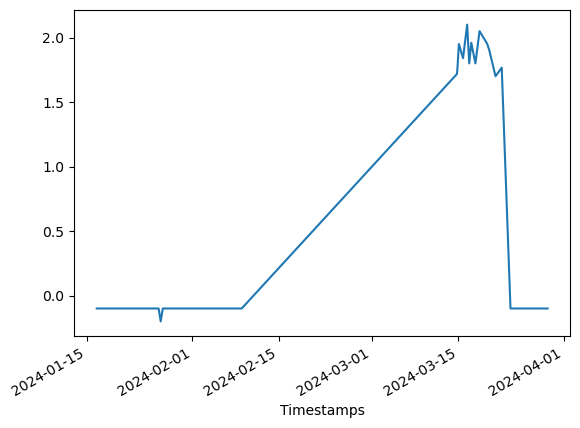

In [31]:
final_df['T1_BB2'].plot()

In [32]:
final_df.reset_index(drop= True, inplace= True )

## Save teh data 

In [33]:
final_df.to_csv("finaldata_time50.csv", header=True)